In [23]:
import numpy as np, scipy, matplotlib
import matplotlib.pyplot as pl
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker
from scipy.signal import detrend
import scipy.constants as const
%matplotlib notebook


In [33]:
g031_freq, g031_temp = np.loadtxt("G031.727.dat", unpack = 1)

#Get the stupid frequencies in ascending order
g031_freq = g031_freq[:: -1] * 1e6
g031_temp = g031_temp[:: -1]

#Trim off the first 500 samples corresponding to bad baseline
g031_freq = g031_freq[300:]
g031_temp = g031_temp[300:]

<IPython.core.display.Javascript object>


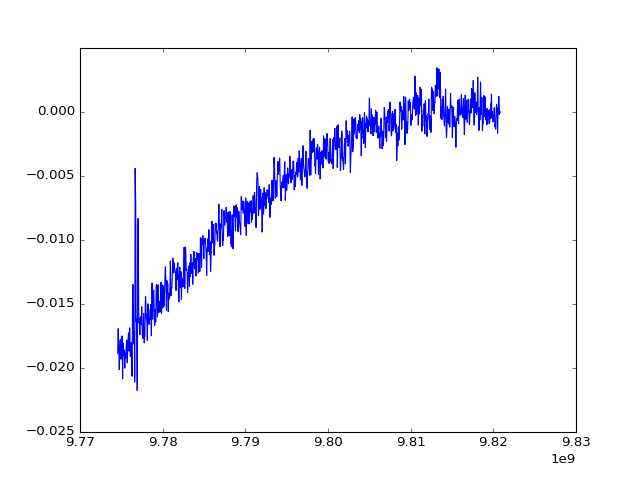

In [34]:
pl.plot(g031_freq, g031_temp)

<IPython.core.display.Javascript object>


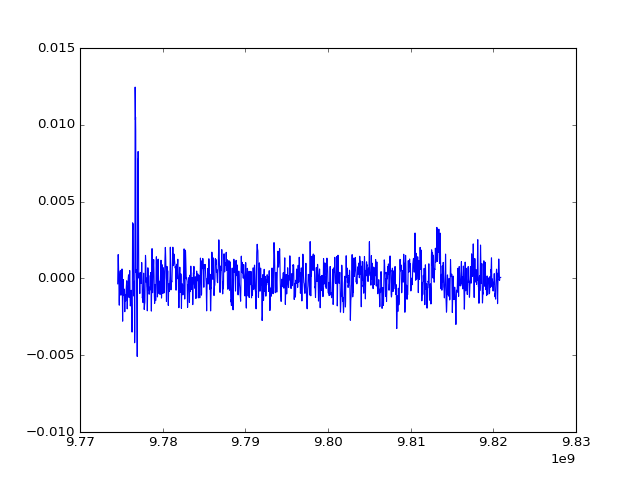

In [35]:
#Script to remove baseline
#Use polyfit instead of curve_fit as don't know the function

coeff = np.polyfit(g031_freq, g031_temp, 3)
baseline = np.poly1d(coeff)

g031_temp_corr = g031_temp - baseline(g031_freq)

pl.plot(g031_freq, g031_temp_corr)

<IPython.core.display.Javascript object>


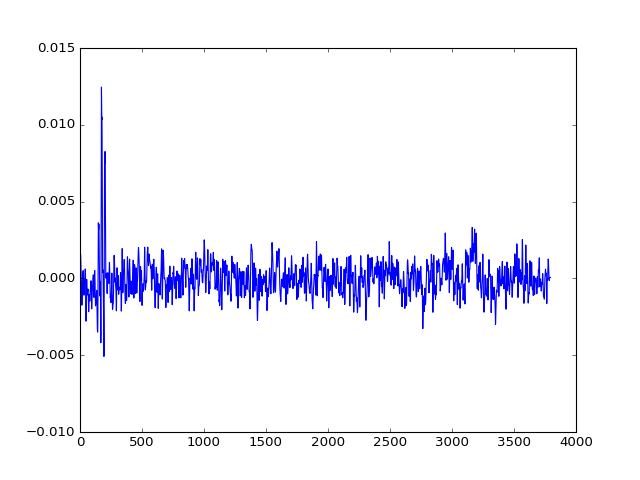

In [36]:
#Smooth the data, cause I can't see the line in this:

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

pl.plot(range(len(g031_freq)), g031_temp_corr)

In [43]:
#Fit that weak line towards the end of the spectrum:

def gaussian(x, a, b, c):
    
    return a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

popt, pconv = curve_fit(gaussian, g031_freq[3100: 3300], g031_temp[3100: 3300], p0 = (0.1, 9815e6, 1e6), maxfev = 2000)

print(popt)
print(np.diag(pconv) ** 2)


[  2.44165854e-03   9.81327166e+09   2.87731956e+05]
[  7.86590489e-16   2.67554334e+17   2.69667202e+17]


<IPython.core.display.Javascript object>


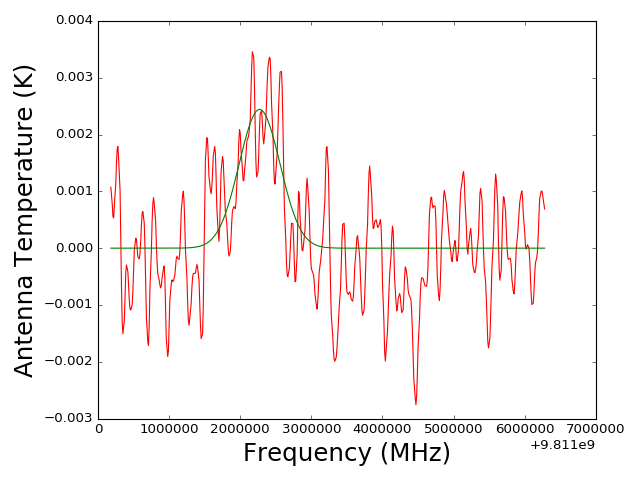

In [44]:
fig, ax = pl.subplots()

ax.plot(g031_freq[3000: 3500], g031_temp[3000: 3500], color = 'r', label = 'data')
ax.plot(g031_freq[3000: 3500], gaussian(g031_freq[3000: 3500], *popt), color = 'g', label = 'fit')

ax.set_xlabel("Frequency (MHz)", fontsize = 22)
ax.set_ylabel("Antenna Temperature (K)", fontsize = 22)

fig.tight_layout()

In [54]:
#Calculate electron temperature and line brightness temperature and EM
#Look at equations 7.35 and 7.97 in ERA

T_e = const.m_p * (const.c ** 2 / (8 * np.log(2) * const.k) ) * (2.355 * popt[2] / popt[1]) ** 2 

print T_e

9362.05051867
